In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
df = pd.read_csv("Hostel_City_Ratings.csv", index_col=[0])
df.head()
df_copy = df.copy()

df_copy

,HI Calgary City Centre,Wicked Hostels - Calgary
0,9.3,9.7
1,9.1,9.1
2,9.4,9.4
3,8.4,9.1
4,9.3,8.3
5,8.7,8.5
6,8.7,8.6


In [2]:
df_test = df_copy.set_axis(['Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Value', 'Facilities'], axis=0, copy=True)

In [3]:
df_test.loc['Average']= df.mean()
df_test

,HI Calgary City Centre,Wicked Hostels - Calgary
Security,9.300000,9.700000
Location,9.100000,9.100000
Staff,9.400000,9.400000
Atmosphere,8.400000,9.100000
Cleanliness,9.300000,8.300000
Value,8.700000,8.500000
Facilities,8.700000,8.600000
Average,8.985714,8.957143


In [4]:
df_test = df_test.T.reset_index()
df_test = df_test.set_axis(['Name', 'Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Value', 'Facilities', 'Average'], axis=1, copy=True)
df_test

,Name,Security,Location,Staff,Atmosphere,Cleanliness,Value,Facilities,Average
0,HI Calgary City Centre,9.3,9.1,9.4,8.4,9.3,8.7,8.7,8.985714
1,Wicked Hostels - Calgary,9.7,9.1,9.4,9.1,8.3,8.5,8.6,8.957143


In [5]:
avg_graph = df_test.iloc[:, [0,8]].head(46)
avg_graph = avg_graph.sort_values('Average', ascending=False)
avg_graph

,Name,Average
0,HI Calgary City Centre,8.985714
1,Wicked Hostels - Calgary,8.957143


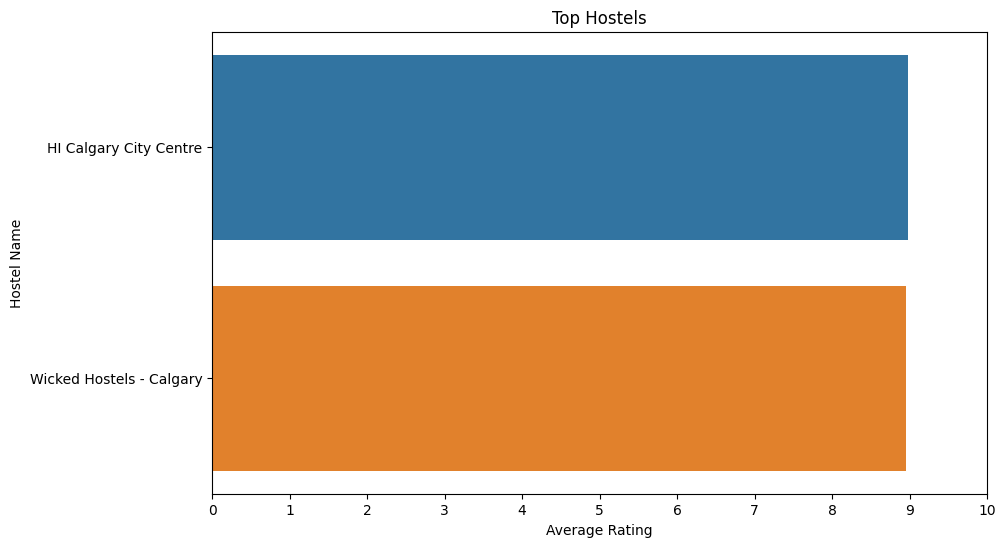

In [6]:
top_ten = avg_graph.sort_values(by= 'Average', ascending=False)[:10]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(0,10)
ax.set_xticks(range(0,11))
sns.barplot(y=top_ten.Name, x=top_ten.Average)

plt.xlabel('Average Rating')
plt.ylabel('Hostel Name')
plt.title('Top Hostels')
plt.savefig('static/images/graph1.png', bbox_inches='tight')
plt.show()
plt.close()
